# Vizualization of final dataframe

In [91]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import linear_model
import seaborn as sns
%matplotlib inline

### Load Dataframe

In [2]:
df = pd.read_pickle('data/reg_model_data_final.pkl')

In [3]:
df.head()

year       DATE         Home            Away  label_h_point_spread  \
0  2007 2007-01-01  Wake Forest   East Carolina                  16.0   
1  2007 2007-01-01    Creighton    Illinois St.                   8.0   
2  2007 2007-01-01   Texas Tech      New Mexico                   2.0   
3  2007 2007-01-01  Chicago St.  New Mexico St.                 -10.0   
4  2007 2007-01-01      Alabama        Oklahoma                  15.0   

   label_home_winner  month  home_bpg  home_drebpg  home_orebpg    ...      \
0                  1      1  3.750000    22.583333    11.333333    ...       
1                  1      1  2.545455    21.181818    11.545455    ...       
2                  1      1  1.928571    20.357143     7.714286    ...       
3                  0      1  3.705882    17.764706    10.352941    ...       
4                  1      1  6.846154    28.461538    12.307692    ...       

   pyth_wp_home  pyth_wp_away  hometeam_ps_var  awayteam_ps_var  home_tovpct  \
0      0.837209      0.882939       343.608187       145.888783     0.186440   
1      0.975231      0.861308       244.286549       128.979898     0.154769   
2      0.935429      0.670642       294.236948       359.185185     0.154327   
3      0.902584      0.801251       324.575980       116.863142     0.180176   
4      0.989624      0.757776       321.533198       116.428571     0.165873   

   away_tovpct  home_ft_factor  away_ft_factor  home_pace  away_pace  
0     0.164656        0.315315        0.209776  59.666667  57.444444  
1     0.208097        0.296796        0.186846  54.000000  62.333333  
2     0.162184        0.278772        0.298789  60.142857  60.923077  
3     0.201647        0.244898        0.373333  61.823529  60.090909  
4     0.205315        0.249347        0.201452  60.230769  60.600000  

[5 rows x 65 columns]

### Create features dataframe

In [25]:
df_features = df.copy()

In [26]:
df_features.drop(['year','DATE','Home','Away','month','label_h_point_spread','label_home_winner'],axis=1, inplace=True)

In [27]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37498 entries, 0 to 37497
Data columns (total 58 columns):
home_bpg            37498 non-null float64
home_drebpg         37498 non-null float64
home_orebpg         37498 non-null float64
home_trebpg         37498 non-null float64
home_foulpg         37498 non-null float64
home_ppg            37498 non-null float64
home_stlpg          37498 non-null float64
home_topg           37498 non-null float64
home_3papg          37498 non-null float64
home_fgapg          37498 non-null float64
home_ftapg          37498 non-null float64
home_apg            37498 non-null float64
home_fgp_var        37498 non-null float64
home_ppg_var        37498 non-null float64
away_bpg            37498 non-null float64
away_drebpg         37498 non-null float64
away_orebpg         37498 non-null float64
away_trebpg         37498 non-null float64
away_foulpg         37498 non-null float64
away_ppg            37498 non-null float64
away_stlpg          37498 non-n

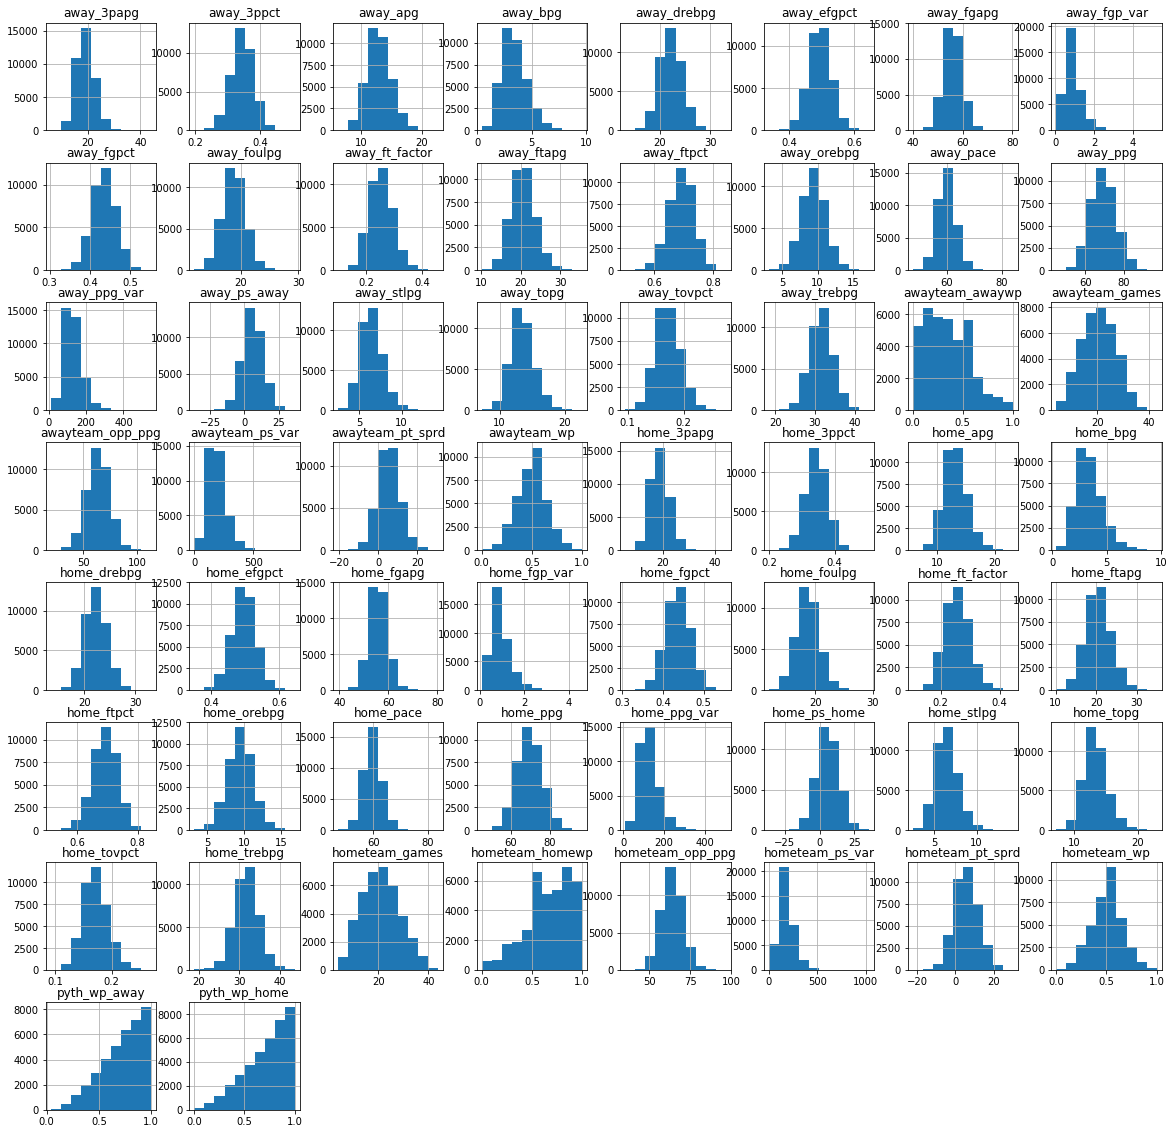

In [138]:
histplot = df_features.hist(figsize=(20,20))
plt.savefig(r"images/features_histplot.png")

### Scattering variables against themselves (using Home - Away)

First calculating home minus away for list of variables and applying it to a new dataframe

In [8]:
def home_minus_away(df,varlst):
    df2 = df.copy()
    for var in varlst:
        df2['diff{}'.format(var)] = df['home{}'.format(var)] - df['away{}'.format(var)]
        df2.drop(['home{}'.format(var),'away{}'.format(var)], axis=1, inplace=True)
    return df2

In [9]:
varlist = ['_bpg','_drebpg','_orebpg','_trebpg','_foulpg','_ppg','_stlpg','_topg','_3papg','_fgapg','_ftapg','_apg','_fgp_var','_ppg_var','_fgpct','_3ppct','_ftpct','_efgpct','team_games','team_wp','team_pt_sprd','team_opp_ppg','team_ps_var','_tovpct','_ft_factor','_pace']

In [10]:
df_diff = home_minus_away(df_features,varlist)

In [11]:
df_diff.columns

Index(['home_ps_home', 'away_ps_away', 'hometeam_homewp', 'awayteam_awaywp',
       'pyth_wp_home', 'pyth_wp_away', 'diff_bpg', 'diff_drebpg',
       'diff_orebpg', 'diff_trebpg', 'diff_foulpg', 'diff_ppg', 'diff_stlpg',
       'diff_topg', 'diff_3papg', 'diff_fgapg', 'diff_ftapg', 'diff_apg',
       'diff_fgp_var', 'diff_ppg_var', 'diff_fgpct', 'diff_3ppct',
       'diff_ftpct', 'diff_efgpct', 'diffteam_games', 'diffteam_wp',
       'diffteam_pt_sprd', 'diffteam_opp_ppg', 'diffteam_ps_var',
       'diff_tovpct', 'diff_ft_factor', 'diff_pace'],
      dtype='object')

Then dropping unnecessary variables.

In [12]:
df_diff.drop(['home_ps_home','away_ps_away','hometeam_homewp','awayteam_awaywp','pyth_wp_home','pyth_wp_away','diff_drebpg','diff_fgpct','diff_3ppct','diffteam_games','diff_topg','diff_ft_factor','diffteam_pt_sprd'], axis=1, inplace=True)

In [13]:
df_diff.columns

Index(['diff_bpg', 'diff_orebpg', 'diff_trebpg', 'diff_foulpg', 'diff_ppg',
       'diff_stlpg', 'diff_3papg', 'diff_fgapg', 'diff_ftapg', 'diff_apg',
       'diff_fgp_var', 'diff_ppg_var', 'diff_ftpct', 'diff_efgpct',
       'diffteam_wp', 'diffteam_opp_ppg', 'diffteam_ps_var', 'diff_tovpct',
       'diff_pace'],
      dtype='object')

Taking random sample from df_diff, as it is too large to scatter

In [14]:
df_diff_samp = df_diff.sample(n=500)

Applying scatter matrix to dataframe

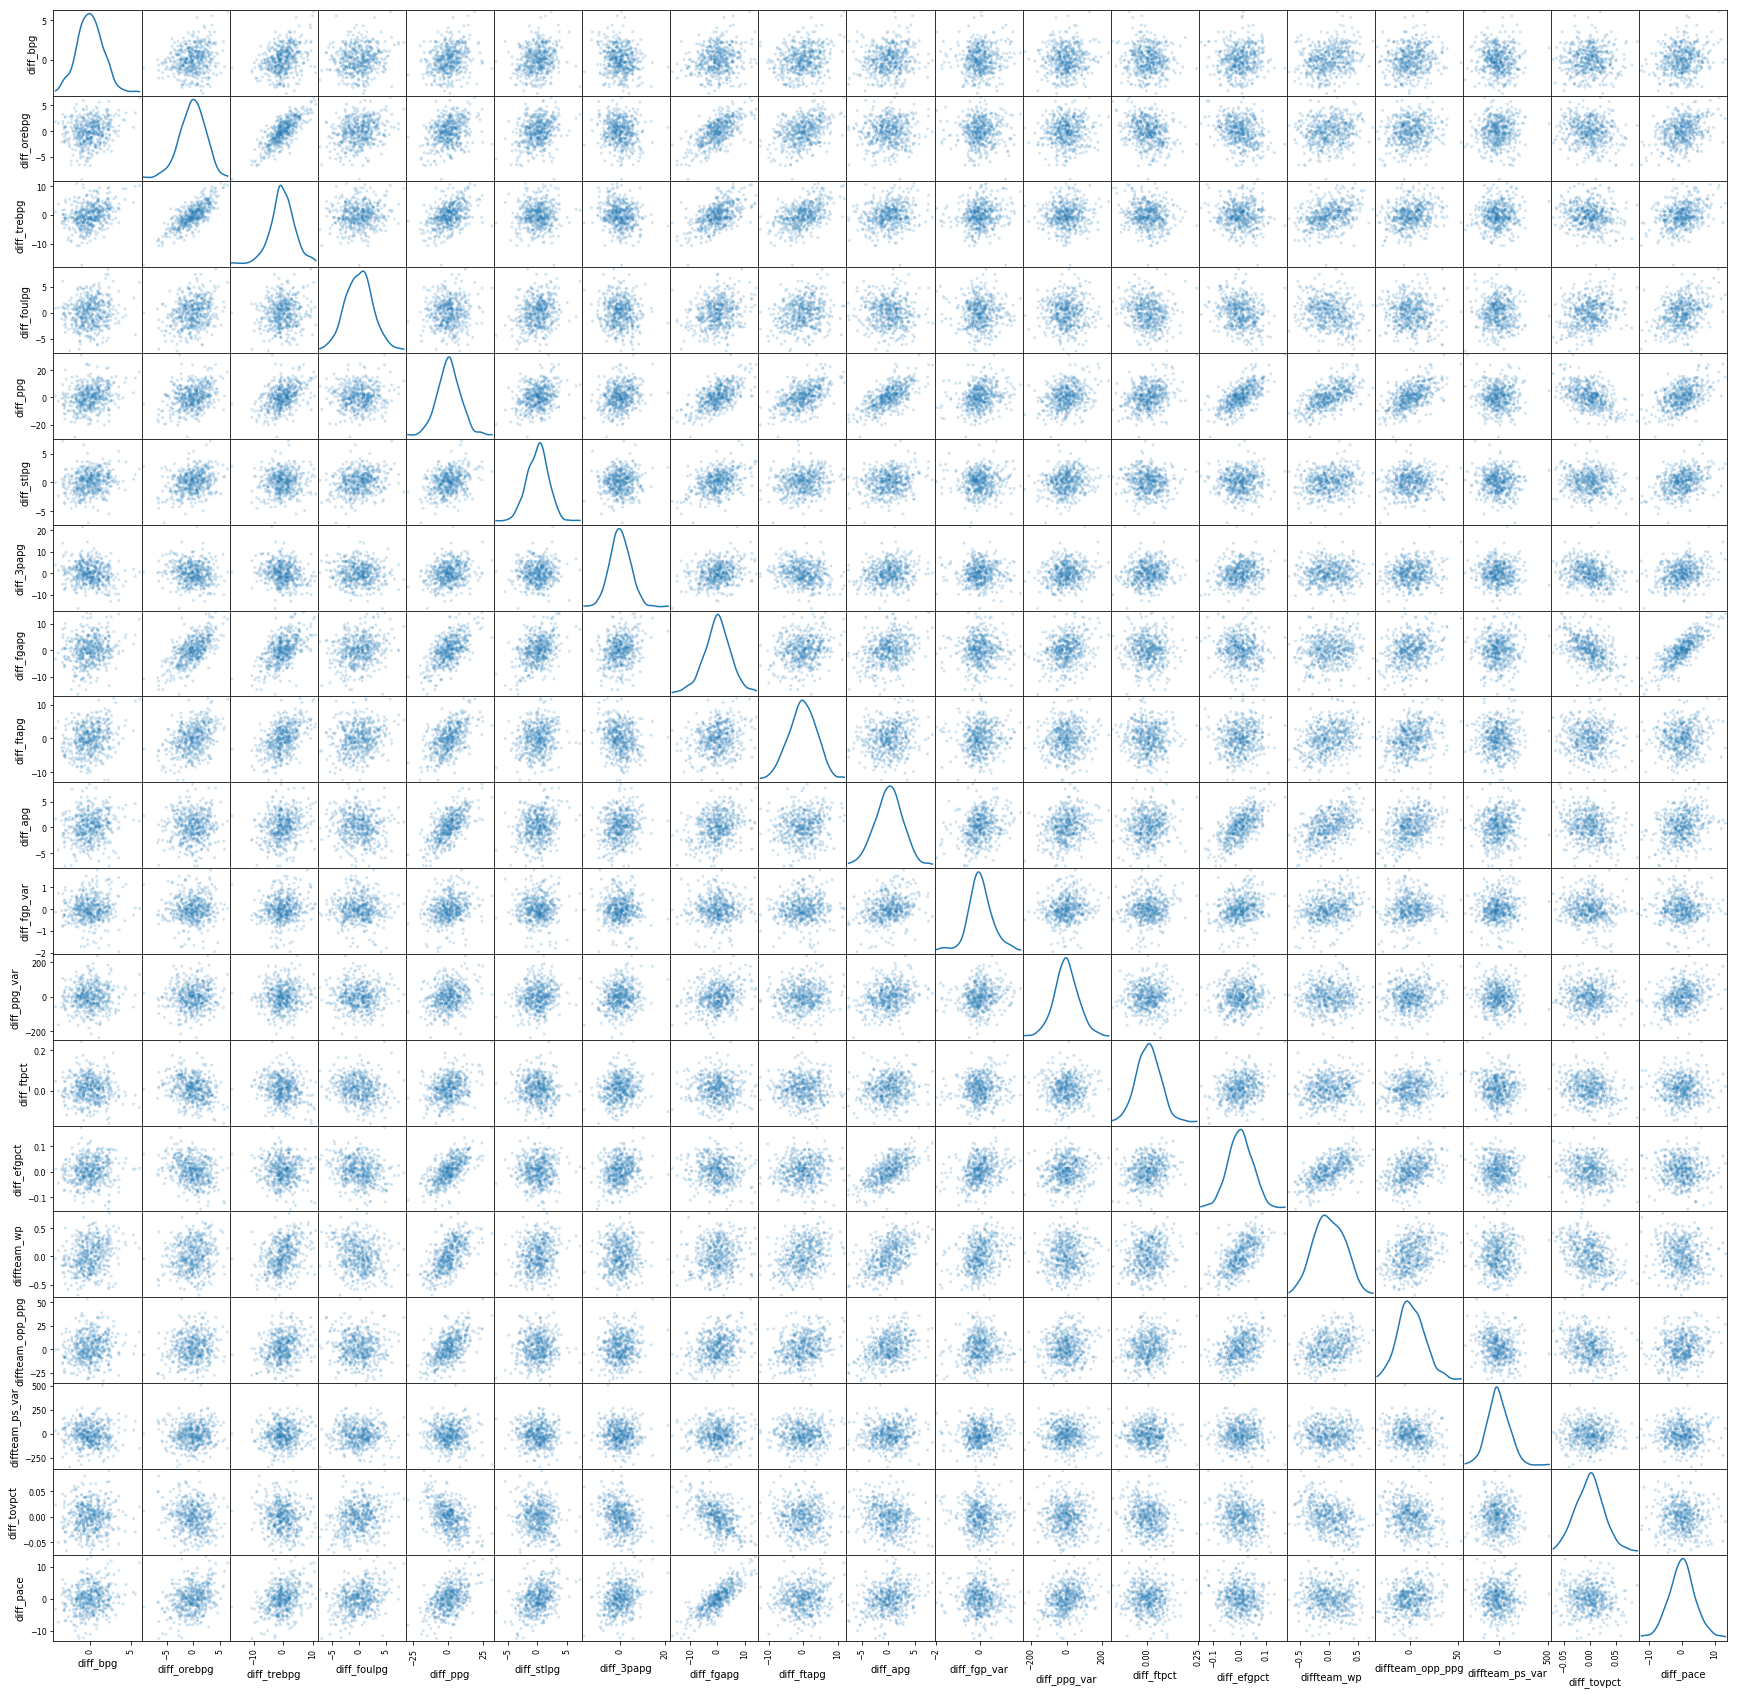

In [136]:
scatplot = scatter_matrix(df_diff_samp, alpha=0.2, figsize = (30,30), diagonal='kde')
plt.savefig(r'images/features_scatter_matrix.png')

Field goals and pace related. 
Pt spread and opp ppg related (understandable, as one is used in calculating the other). 
Effective field goal percentage and points per game related
PPG is related to winning percentage and efgpct.

### Scattering these differences with the pts_spread label

In [43]:
df2 = df.copy()

In [44]:
df2 = home_minus_away(df2,varlist)

In [45]:
df2_samp = df2.sample(n=500)

In [115]:
labels = df2_samp['label_h_point_spread']

In [116]:
df3_samp = df2_samp.copy()

In [117]:
df3_samp.columns

Index(['year', 'DATE', 'Home', 'Away', 'label_h_point_spread',
       'label_home_winner', 'month', 'home_ps_home', 'away_ps_away',
       'hometeam_homewp', 'awayteam_awaywp', 'pyth_wp_home', 'pyth_wp_away',
       'diff_bpg', 'diff_drebpg', 'diff_orebpg', 'diff_trebpg', 'diff_foulpg',
       'diff_ppg', 'diff_stlpg', 'diff_topg', 'diff_3papg', 'diff_fgapg',
       'diff_ftapg', 'diff_apg', 'diff_fgp_var', 'diff_ppg_var', 'diff_fgpct',
       'diff_3ppct', 'diff_ftpct', 'diff_efgpct', 'diffteam_games',
       'diffteam_wp', 'diffteam_pt_sprd', 'diffteam_opp_ppg',
       'diffteam_ps_var', 'diff_tovpct', 'diff_ft_factor', 'diff_pace'],
      dtype='object')

In [118]:
df3_samp.drop(['pyth_wp_home','pyth_wp_away','year','DATE','Home','Away','label_home_winner','month'], axis=1, inplace=True)

In [125]:
collist = list(df3_samp.columns.values)

In [127]:
collist.pop(0)

'label_h_point_spread'

/Users/User/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


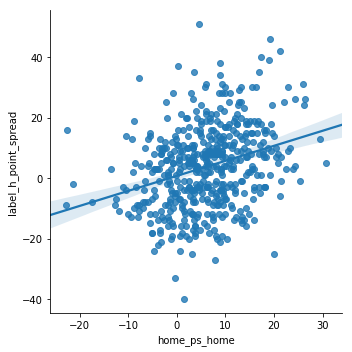

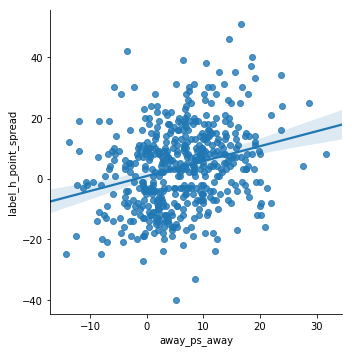

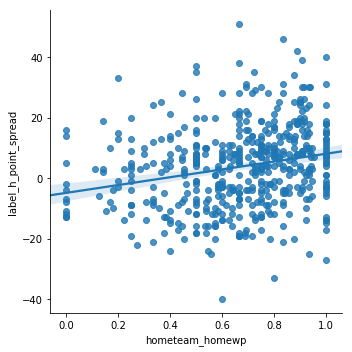

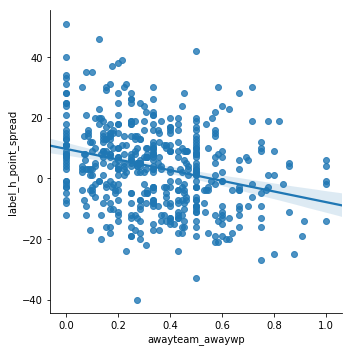

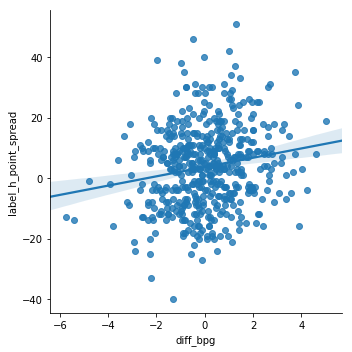

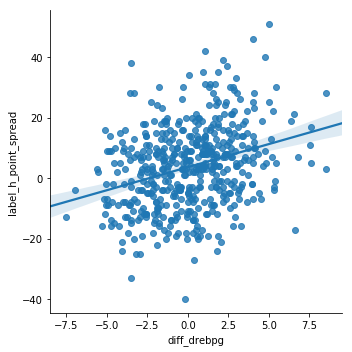

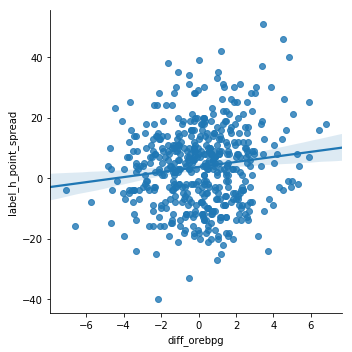

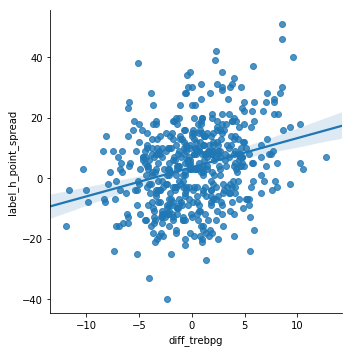

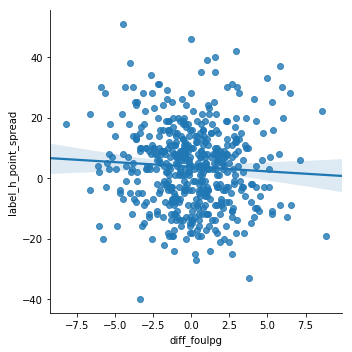

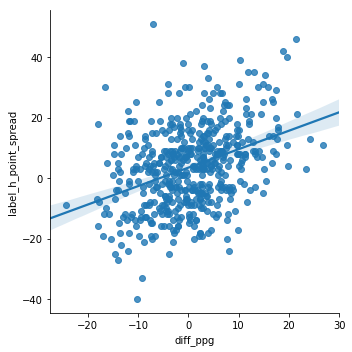

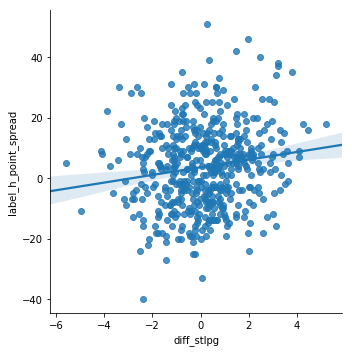

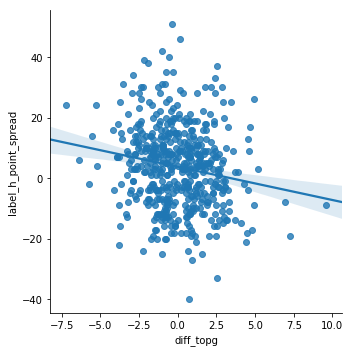

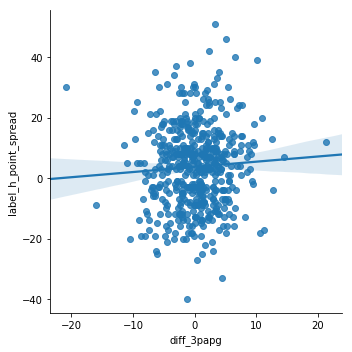

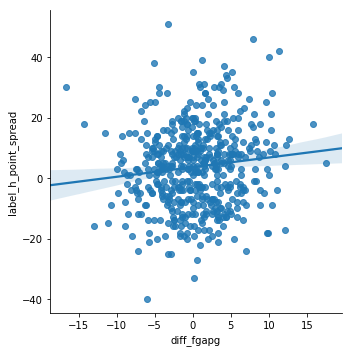

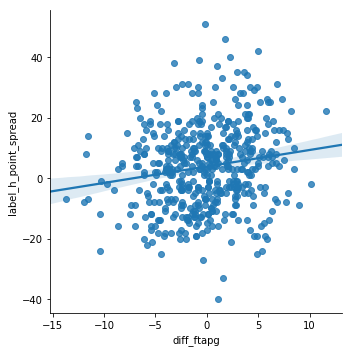

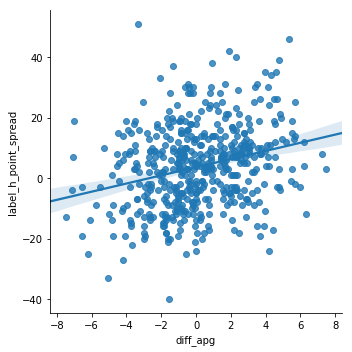

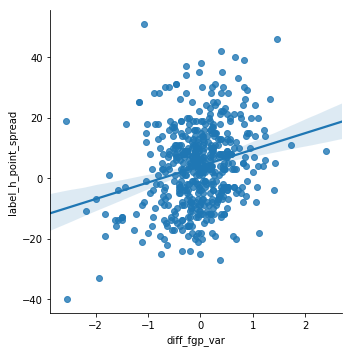

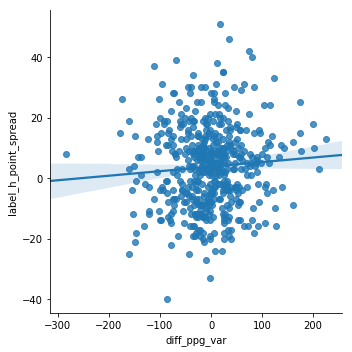

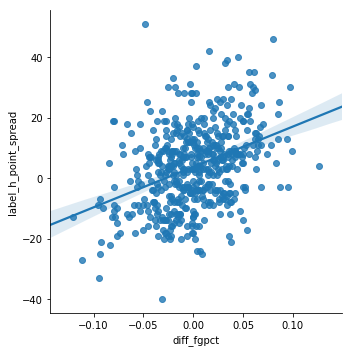

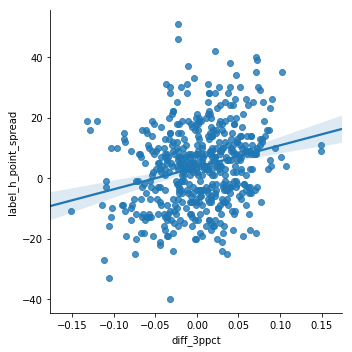

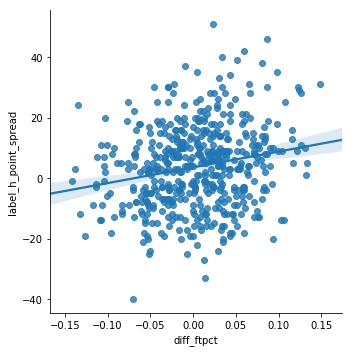

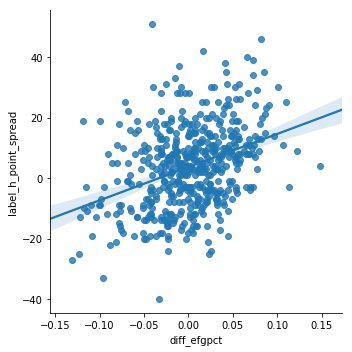

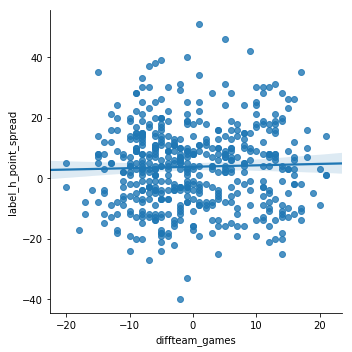

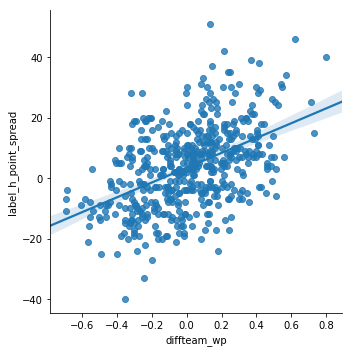

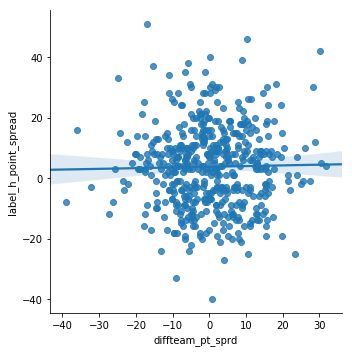

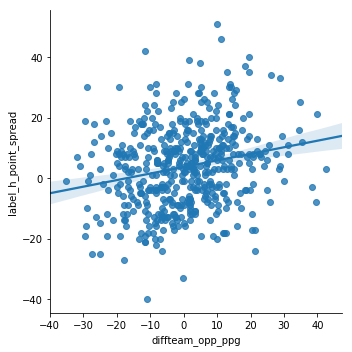

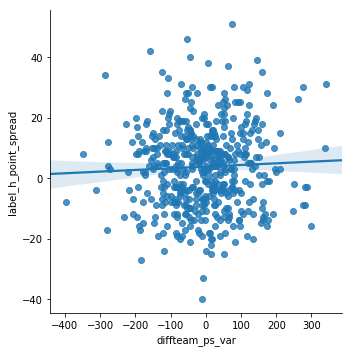

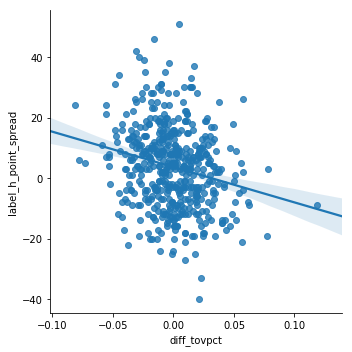

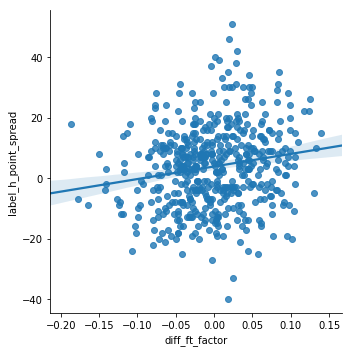

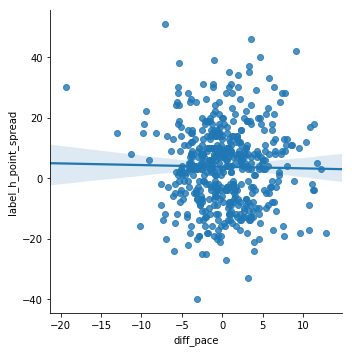

In [132]:
#fig, axes = plt.subplots(5,6, figsize=(20,24))
for col in collist:
    sns_plot = sns.lmplot(x=col, y='label_h_point_spread', data = df3_samp)
    plt.savefig(r"images/{}_and_home_point_spread.png".format(col))
    # for col,ax in zip(cols, axes.flatten()):
    #make_scatter_plot(df3_samp,col)
#plt.subplots_adjust(wspace=0.4,hspace=.4)